In [118]:
import pandas as pd
import re
from datetime import timedelta


In [119]:
df = pd.read_csv('/content/customer_support_tickets.csv.zip')

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

print("\nColumn Names:")
print(df.columns)

print("\nMissing Values in Each Column:")
print(df.isnull().sum())

print("\nSample Tickets (First 5 Rows):")
display(df.head())


Rows: 8469
Columns: 17

Column Names:
Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

Missing Values in Each Column:
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time    

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [120]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_message"] = df["Ticket Description"].apply(clean_text)
print("Before Cleaning:")
print(df["Ticket Description"].head(3))

print("\nAfter Cleaning:")
print(df["clean_message"].head(3))



Before Cleaning:
0    I'm having an issue with the {product_purchase...
1    I'm having an issue with the {product_purchase...
2    I'm facing a problem with my {product_purchase...
Name: Ticket Description, dtype: object

After Cleaning:
0    i m having an issue with the product purchased...
1    i m having an issue with the product purchased...
2    i m facing a problem with my product purchased...
Name: clean_message, dtype: object


In [121]:
def classify_issue(msg):
    if any(k in msg for k in ["payment", "bill", "charged", "card"]):
        return "PAYMENT"
    if any(k in msg for k in ["login", "password", "otp"]):
        return "LOGIN"
    if any(k in msg for k in ["delivery", "shipping", "courier"]):
        return "DELIVERY"
    if any(k in msg for k in ["refund", "return"]):
        return "REFUND"
    if any(k in msg for k in ["error", "bug", "crash"]):
        return "BUG"
    return "GENERAL"

df["issue_type"] = df["clean_message"].apply(classify_issue)
print("\nSample Issue Classification (Customer-wise):")

display(
    df[[
        "Customer Email",
        "clean_message",
        "issue_type"
    ]].head(10)
)



print("Issue Type Distribution:")
print(df["issue_type"].value_counts())




Sample Issue Classification (Customer-wise):


,Customer Email,clean_message,issue_type
0,carrollallison@example.com,i m having an issue with the product purchased...,PAYMENT
1,clarkeashley@example.com,i m having an issue with the product purchased...,GENERAL
2,gonzalestracy@example.com,i m facing a problem with my product purchased...,GENERAL
3,bradleyolson@example.org,i m having an issue with the product purchased...,GENERAL
4,bradleymark@example.com,i m having an issue with the product purchased...,DELIVERY
5,sheenasmith@example.com,i m facing a problem with my product purchased...,GENERAL
6,donaldkeith@example.org,i m unable to access my product purchased acco...,LOGIN
7,joelwilliams@example.com,i m having an issue with the product purchased...,GENERAL
8,joshua24@example.com,i m having an issue with the product purchased...,GENERAL
9,clopez@example.com,my product purchased is making strange noises ...,GENERAL


Issue Type Distribution:
issue_type
GENERAL     6365
BUG         1084
LOGIN        437
PAYMENT      241
REFUND       237
DELIVERY     105
Name: count, dtype: int64


In [122]:
def assign_priority(msg):
    if any(k in msg for k in ["urgent", "immediately", "failed"]):
        return "P0"
    if any(k in msg for k in ["not working", "error", "delay"]):
        return "P1"
    if any(k in msg for k in ["slow", "problem"]):
        return "P2"
    return "P3"

df["priority"] = df["clean_message"].apply(assign_priority)
print("Priority Distribution:")
print(df["priority"].value_counts())



Priority Distribution:
priority
P3    4992
P2    2100
P1    1172
P0     205
Name: count, dtype: int64


In [123]:

priority_view = df[[
    "Customer Email",
    "priority",
    "Ticket Description"
]].copy()


priority_order = {
    "P0": 1,
    "P1": 2,
    "P2": 3,
    "P3": 4
}

priority_view["priority_rank"] = priority_view["priority"].map(priority_order)


priority_view = priority_view.sort_values("priority_rank")


display(priority_view.drop(columns="priority_rank").head(20))


,Customer Email,priority,Ticket Description
24,lbarron@example.org,P0,I'm having an issue with the {product_purchase...
8335,ginanorton@example.net,P0,I've accidentally deleted important data from ...
1530,janethoward@example.org,P0,I'm having an issue with the {product_purchase...
1479,heather30@example.net,P0,I've accidentally deleted important data from ...
1344,collinscarrie@example.org,P0,I've accidentally deleted important data from ...
1348,ubailey@example.com,P0,I'm having an issue with the {product_purchase...
1573,perezkelsey@example.org,P0,I'm having an issue with the {product_purchase...
1563,silvaadam@example.org,P0,I've accidentally deleted important data from ...
1542,jessicabarrett@example.net,P0,I've accidentally deleted important data from ...
1651,johnathanhughes@example.net,P0,I'm having an issue with the {product_purchase...


In [124]:
sla_map = {"P0": 2, "P1": 8, "P2": 24, "P3": 48}
df["sla_hours"] = df["priority"].map(sla_map)

df["First Response Time"] = pd.to_datetime(df["First Response Time"])
df["due_time"] = df["First Response Time"] + df["sla_hours"].apply(lambda x: timedelta(hours=x))
df[["First Response Time", "priority", "sla_hours", "due_time"]].head()



,First Response Time,priority,sla_hours,due_time
0,2023-06-01 12:15:36,P3,48,2023-06-03 12:15:36
1,2023-06-01 16:45:38,P3,48,2023-06-03 16:45:38
2,2023-06-01 11:14:38,P2,24,2023-06-02 11:14:38
3,2023-06-01 07:29:40,P2,24,2023-06-02 07:29:40
4,2023-06-01 00:12:42,P3,48,2023-06-03 00:12:42


In [125]:
report = (
    df.groupby(
        ["Customer Email", "issue_type", "priority"],
        sort=False
    )
    .size()
    .reset_index(name="ticket_count")
)

print(report.head(10))

               Customer Email issue_type priority  ticket_count
0  carrollallison@example.com    PAYMENT       P3             1
1    clarkeashley@example.com    GENERAL       P3             1
2   gonzalestracy@example.com    GENERAL       P2             1
3    bradleyolson@example.org    GENERAL       P2             1
4     bradleymark@example.com   DELIVERY       P3             1
5     sheenasmith@example.com    GENERAL       P2             1
6     donaldkeith@example.org      LOGIN       P1             1
7    joelwilliams@example.com    GENERAL       P2             1
8        joshua24@example.com    GENERAL       P3             1
9          clopez@example.com    GENERAL       P3             1


In [126]:

df.drop(
    columns=["Ticket Priority", "Ticket Description"],
    inplace=False
).to_csv("final_support_tickets.csv", index=False)

print("Final CSV file exported successfully!")



Final CSV file exported successfully!


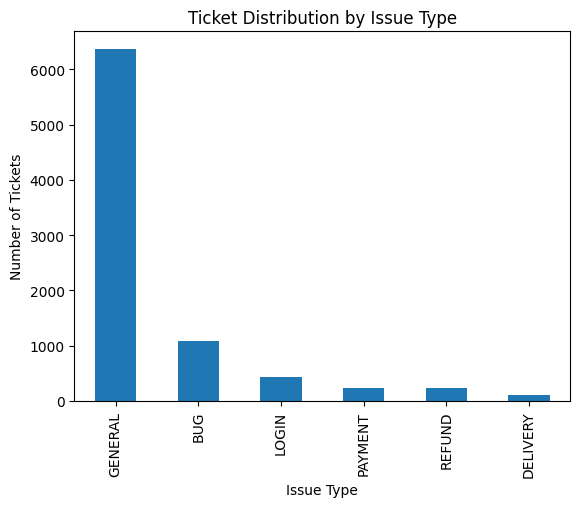

In [127]:
import matplotlib.pyplot as plt

df["issue_type"].value_counts().plot(kind="bar")
plt.title("Ticket Distribution by Issue Type")
plt.xlabel("Issue Type")
plt.ylabel("Number of Tickets")
plt.show()


In [128]:
risk_customers = (
    df[df["priority"].isin(["P0", "P1"])]
    .groupby("Customer Email")
    .size()
    .reset_index(name="high_priority_tickets")
    .sort_values(by="high_priority_tickets", ascending=False)
)

print("Top Risk Customers:")
display(risk_customers.head())


Top Risk Customers:


,Customer Email,high_priority_tickets
1323,xarmstrong@example.net,2
1341,yjones@example.com,2
943,ochoasandra@example.com,1
919,nicholas58@example.org,1
918,nicholas37@example.com,1
